In [1]:
library(nlme)
library(MASS)
library(multilevel)
library(readr)

In [2]:
datos <- read_csv('/home/taz/Documentos/git/Validacion/Pilotaje_tesis_datos_con_códigos.csv',skip=0, col_names=TRUE)
datos_corregidos <- read_csv('/home/taz/Documentos/git/Validacion/Pilotaje_tesis_datos_corregidos.csv',skip=0, col_names=TRUE)

Parsed with column specification:
cols(
  .default = col_double(),
  `p1 genero` = col_character(),
  `p2 dependencia` = col_character(),
  `p4 profesion` = col_character(),
  `p5 genero-director` = col_character(),
  `p6 genero-utp` = col_character(),
  `p7genero-inspector` = col_character(),
  `p22  requisito-centroestudiante` = col_character(),
  `p23 postulacion-centroestudiantes` = col_character(),
  `p24 eleccion-centroestudiante` = col_character(),
  `p26 relacion-director-estudiante` = col_character(),
  `p27 decisiones-proyectos` = col_character(),
  `p28 rol-centroestudiante` = col_character(),
  `p29 elaboracion-pi` = col_character(),
  `p30 rol-centropadres` = col_character(),
  `p31 obgetivo-pedagogico` = col_character(),
  `p32 rol-director-ciudadania` = col_character(),
  `p33 ciudadania-como` = col_character(),
  `p34 orientacion-director-ciudadania` = col_character(),
  `p35 director-conflicto-estudiantes` = col_character(),
  `p36 director-conflicto-apoderados` = col_

In [3]:
datos_corregidos$`p26 relacion-director-estudiante`[datos_corregidos$`p26 relacion-director-estudiante` == "abierta"] <- 4
datos_corregidos$`p26 relacion-director-estudiante`[datos_corregidos$`p26 relacion-director-estudiante` == "normativa"] <- 3
datos_corregidos$`p26 relacion-director-estudiante`[datos_corregidos$`p26 relacion-director-estudiante` == "direccionada"] <- 2
datos_corregidos$`p26 relacion-director-estudiante`[datos_corregidos$`p26 relacion-director-estudiante` == "no-existe"] <- 1
datos_corregidos$`p26 relacion-director-estudiante`=as.numeric(datos_corregidos$`p26 relacion-director-estudiante`)
#datos_corregidos$`p26 relacion-director-estudiante`

In [4]:
datos_corregidos$`p35 director-conflicto-estudiantes`[datos_corregidos$`p35 director-conflicto-estudiantes` == "oportunidad"] <- 1
datos_corregidos$`p35 director-conflicto-estudiantes`[datos_corregidos$`p35 director-conflicto-estudiantes` == "consenso"] <- 2
datos_corregidos$`p35 director-conflicto-estudiantes`[datos_corregidos$`p35 director-conflicto-estudiantes` == "negacion"] <- 3
datos_corregidos$`p35 director-conflicto-estudiantes`[datos_corregidos$`p35 director-conflicto-estudiantes` == "otro"] <- ''
datos_corregidos$`p35 director-conflicto-estudiantes`=as.numeric(datos_corregidos$`p35 director-conflicto-estudiantes`)
#datos_corregidos$`p35 director-conflicto-estudiantes`

In [5]:
#Corroborar correspondencia
datos_corregidos$`p36 director-conflicto-apoderados`[datos_corregidos$`p36 director-conflicto-apoderados` == "dialogo"] <- 1
datos_corregidos$`p36 director-conflicto-apoderados`[datos_corregidos$`p36 director-conflicto-apoderados` == "imagen"] <- 2
datos_corregidos$`p36 director-conflicto-apoderados`[datos_corregidos$`p36 director-conflicto-apoderados` == "reglas"] <- 3
datos_corregidos$`p36 director-conflicto-apoderados`[datos_corregidos$`p36 director-conflicto-apoderados` == "otro"] <- ''
datos_corregidos$`p36 director-conflicto-apoderados`=as.numeric(datos_corregidos$`p36 director-conflicto-apoderados`)
#datos_corregidos$`p36 director-conflicto-apoderados`

# Fiabilidad

### Se considera que existe una buena consistencia interna cuando el valor de alfa es superior a 0,7, según Formación continuada Diseño y validación de cuestionarios (paper facilitado) en la literatura cláscia es mayor a 0.3 pero hay debate respecto a esto.

# Liderazgo autoritario

### Considerando los NA

In [6]:
as.data.frame(cronbach(datos[,8:17]))

Alpha,N
<dbl>,<int>
0.7573786,97


In [7]:
cronbach(datos[,8:17])$Alpha
cronbach(datos[,8:17])$N

[1] 0.7573786

[1] 97

### Datos faltantes incorporados con moda

In [8]:
as.data.frame(cronbach(datos_corregidos[,8:17]))

Alpha,N
<dbl>,<int>
0.7672131,101


In [9]:
cronbach(datos_corregidos[,8:17])$Alpha
cronbach(datos_corregidos[,8:17])$N

[1] 0.7672131

[1] 101

# Formación minimalista

### Considerando los NA

In [10]:
as.data.frame(cronbach(datos[,18:20]))

Alpha,N
<dbl>,<int>
0.6984669,99


In [11]:
cronbach(datos[,18:20])$Alpha
cronbach(datos[,18:20])$N

[1] 0.6984669

[1] 99

### Datos faltantes incorporados con moda

In [12]:
as.data.frame(cronbach(datos_corregidos[,18:20]))

Alpha,N
<dbl>,<int>
0.6987556,101


In [13]:
cronbach(datos_corregidos[,18:20])$Alpha
cronbach(datos_corregidos[,18:20])$N

[1] 0.6987556

[1] 101

# Liderazgo

### Data única por reescalamiento de opciones

In [14]:
as.data.frame(cronbach(datos_corregidos[,25:26]))

Alpha,N
<dbl>,<int>
0.7073463,101


In [15]:
cronbach(datos_corregidos[,25:26])$Alpha
cronbach(datos_corregidos[,25:26])$N

[1] 0.7073463

[1] 101

# Democracia

### Data única por reescalamiento de opciones

In [16]:
as.data.frame(cronbach(datos_corregidos[,35:36]))

Alpha,N
<dbl>,<int>
0.7941338,94


In [17]:
cronbach(datos_corregidos[,35:36])$Alpha
cronbach(datos_corregidos[,35:36])$N

[1] 0.7941338

[1] 94

# Liderazgo democratico

### No existen datos faltantes para estee constructo

In [22]:
as.data.frame(cronbach(datos_corregidos[,37:42]))

Alpha,N
<dbl>,<int>
0.9237079,101


In [23]:
cronbach(datos_corregidos[,37:42])$Alpha
cronbach(datos_corregidos[,37:42])$N

[1] 0.9237079

[1] 101

In [34]:
#my_data <- datos[,8:20 ]

In [222]:
#my_data

# Frecuencia y moda de los datos

In [24]:
library(modeest)

In [25]:
mlv(datos_corregidos$`p12 amenaza-inspectoria`, method = "mfv")

[1] 3

In [26]:
as.data.frame(apply(datos_corregidos, 2, mlv,  method = "mfv")) #Incorporar frecuencia de la moda absoluta

,"apply(datos_corregidos, 2, mlv, method = ""mfv"")"
,<fct>
p1 genero,mujer
p2 dependencia,municipal
p3 edad,2
p4 profesion,basica
p5 genero-director,mujer
p6 genero-utp,mujer
p7genero-inspector,mujer
p8 decision-autorizacion,3
p9 director-encargado-normas,4


In [51]:
max(table(datos[,1]))#Construir un for con esto y agregar al DF

[1] 85

# Graficos

## Pregunta 1

## Género:

In [53]:
library(RColorBrewer) #Libreria de colores

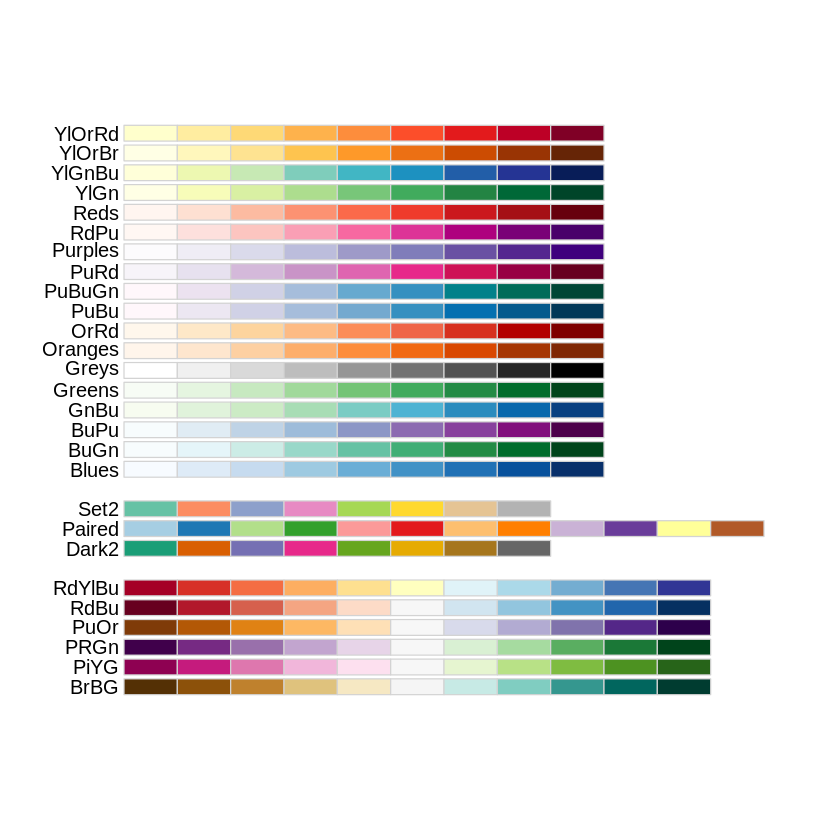

In [54]:
display.brewer.all(colorblindFriendly = T)  
#nombre de paletas de colores en este caso utilizaremos Dark2 por mayor variedad de colores y más accesibilidad para personas en situación de discapacidad visual

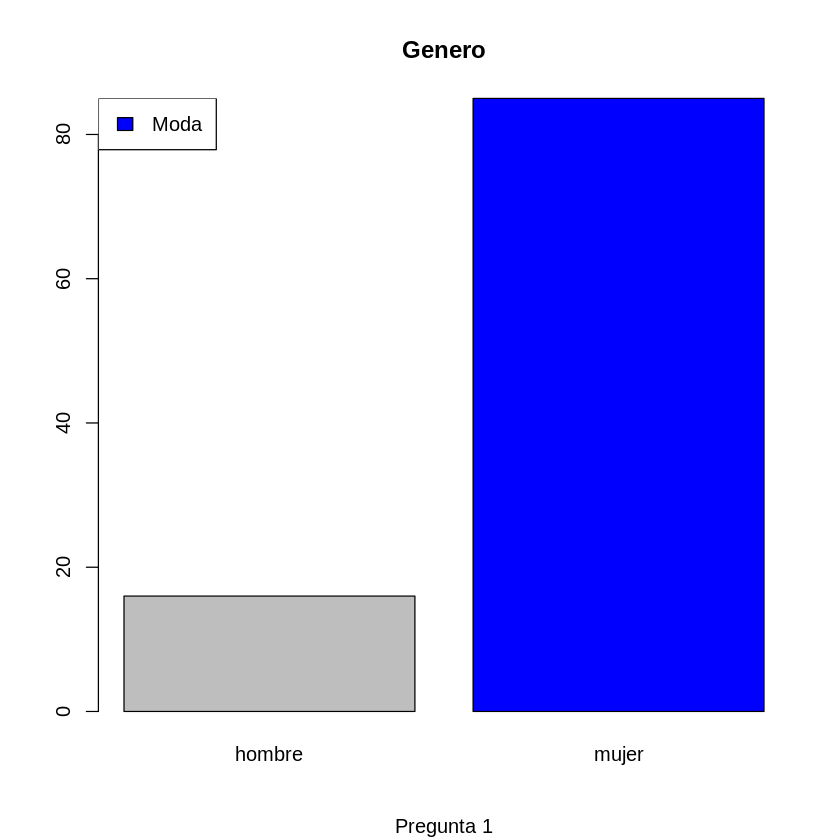

In [55]:
barplot(table(datos[,1]),main = "Genero",sub = "Pregunta 1", col = c(rep("gray", 1),4))
legend("topleft", "Moda", fill = 4)

In [56]:
porcentajes <- as.numeric(round(((prop.table(table(datos[,1])))*100),2))
etiquetas <- c("Hombre", "Mujer")
etiquetas <- paste(etiquetas, porcentajes)
etiquetas <- paste(etiquetas, "%", sep = "")

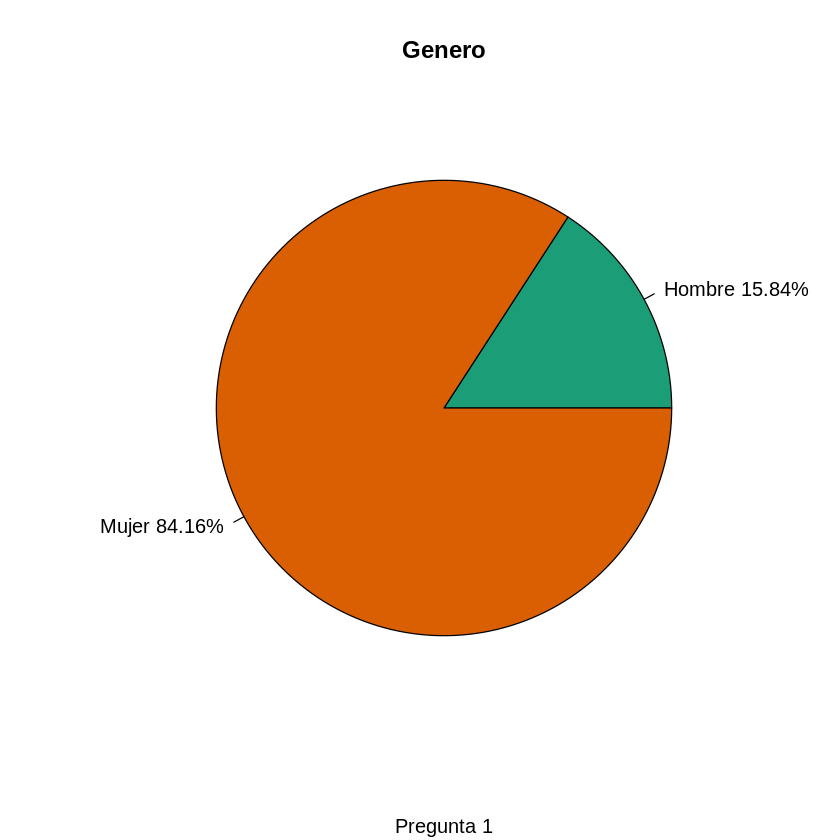

In [57]:
pie(porcentajes, etiquetas,
    main = "Genero",
    sub = "Pregunta 1",
   col=brewer.pal(4, "Dark2"))

## Pregunta 2

## Tipo de dependencia de la escuela donde trabaja:

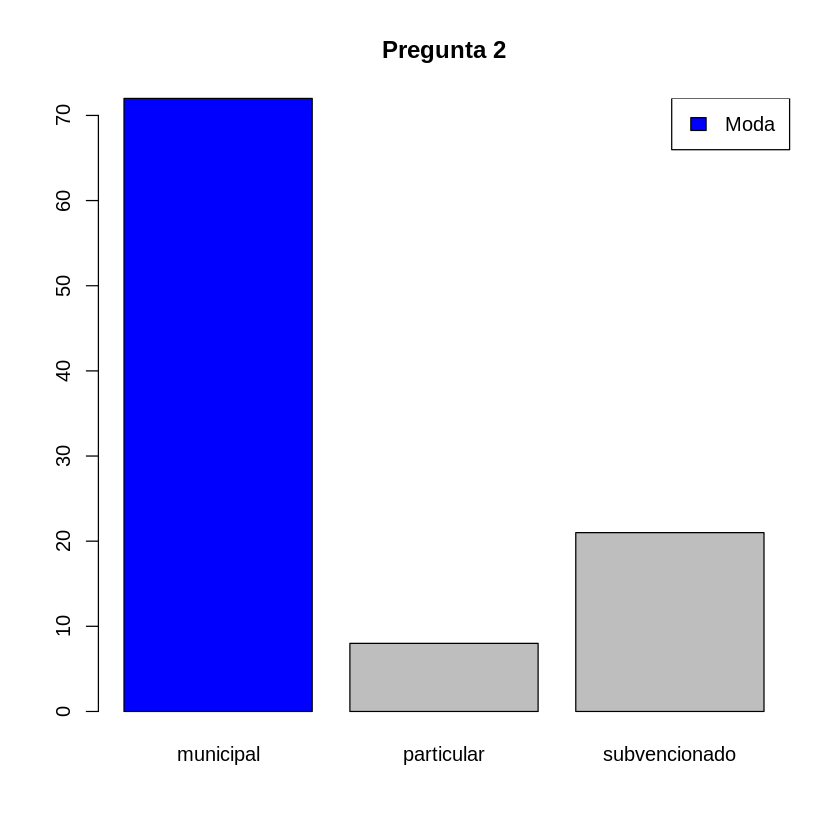

In [58]:
barplot(table(datos[,2]),main = "Pregunta 2", col = c(4,rep("gray", 2)))
legend("topright", "Moda", fill = 4)

In [59]:
porcentajes <- as.numeric(round(((prop.table(table(datos[,2])))*100),2))
etiquetas <- c("Municipal", "particular","Subvencionado")
etiquetas <- paste(etiquetas, porcentajes)
etiquetas <- paste(etiquetas, "%", sep = "")

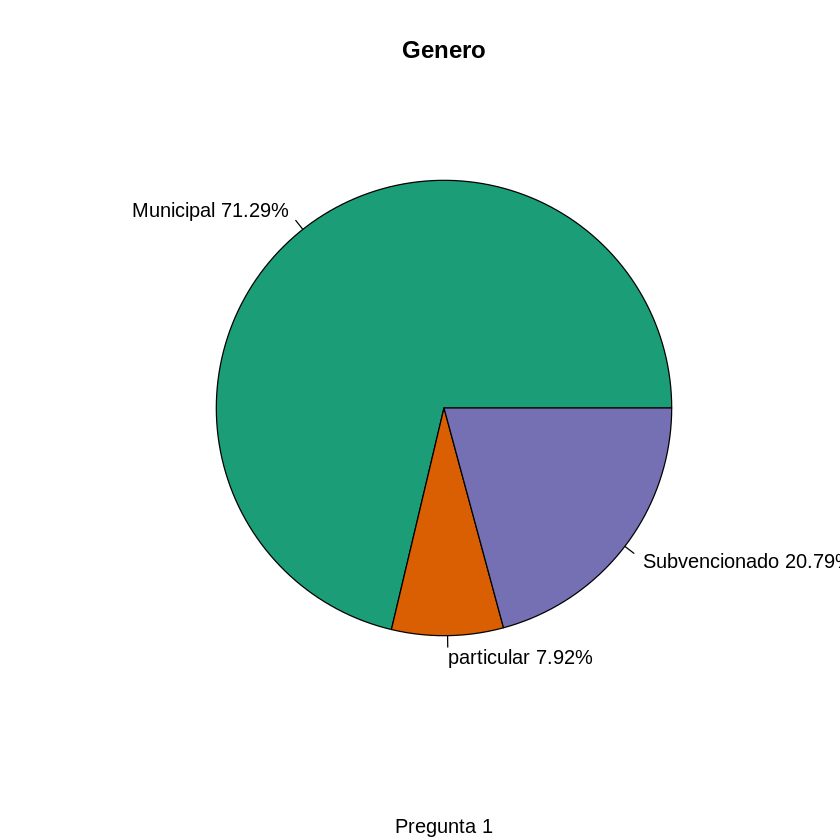

In [60]:
pie(porcentajes, etiquetas,
    main = "Genero",
    sub = "Pregunta 1",
   col=brewer.pal(4, "Dark2"))

## Pregunta 3

## Edad:

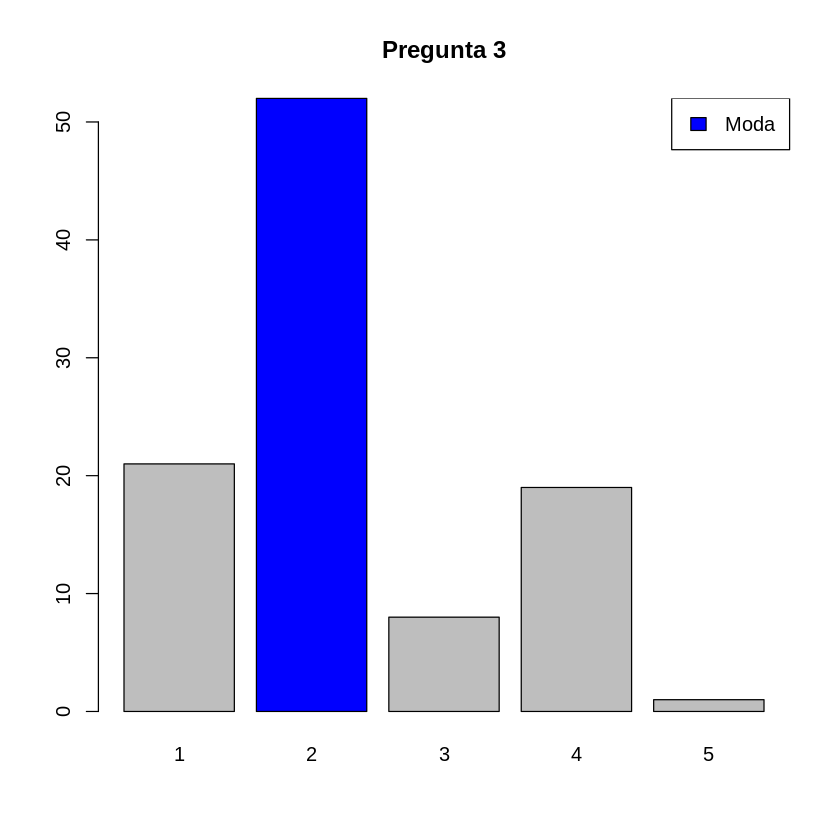

In [61]:
barplot(table(datos[,3]),main = "Pregunta 3", col = c("gray",4,rep("gray", 3)))
legend("topright", "Moda", fill = 4)

## Pregunta 4

## Profesión

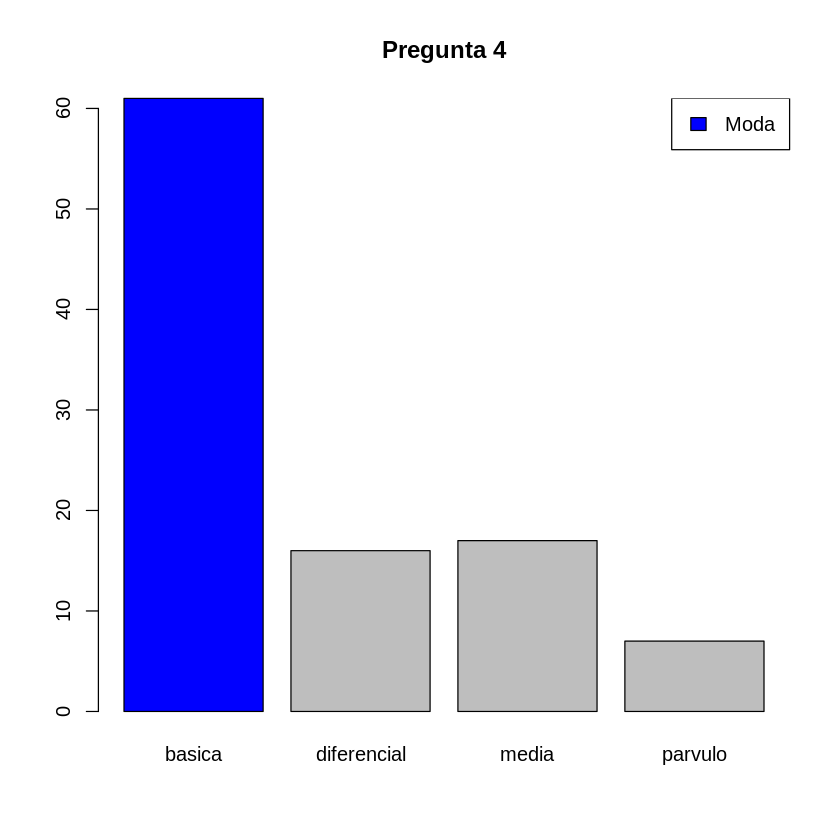

In [62]:
barplot(table(datos[,4]),main = "Pregunta 4", col = c(4,rep("gray", 3)))
legend("topright", "Moda", fill = 4)

## Pregunta 5

## Genero de director(a)

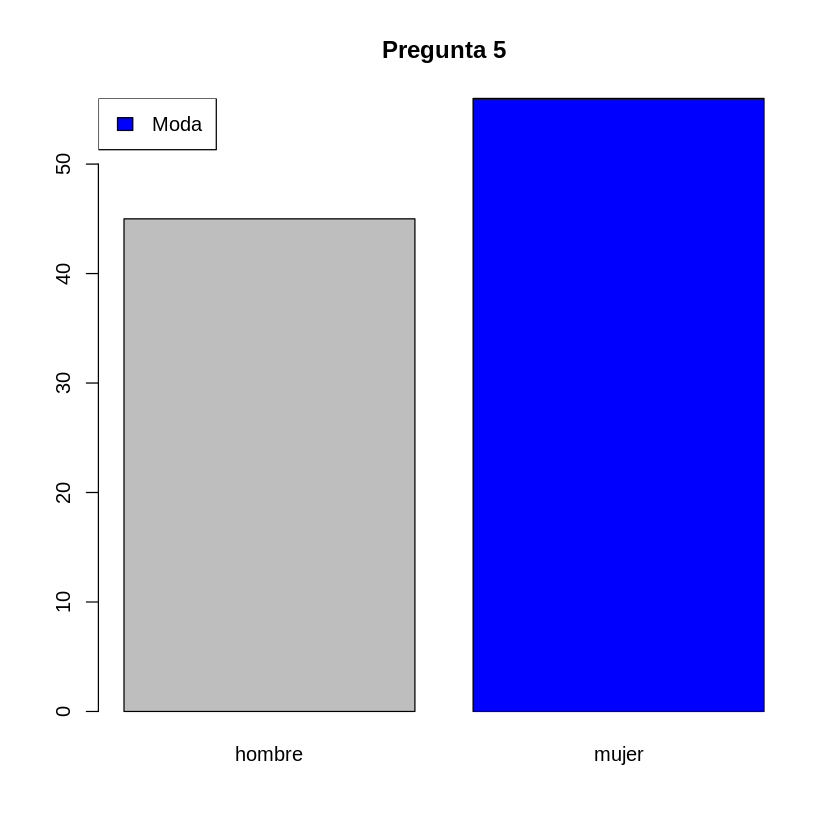

In [63]:
barplot(table(datos[,5]),main = "Pregunta 5", col = c(rep("gray", 1),4))
legend("topleft", "Moda", fill = 4)

## Pregunta 6

## Género UTP

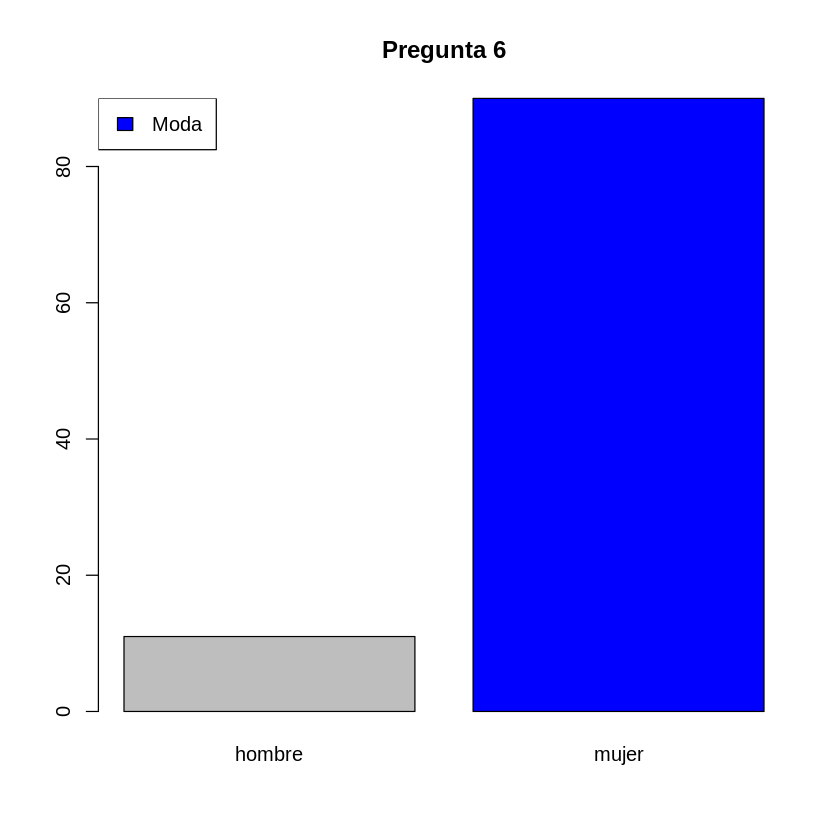

In [64]:
barplot(table(datos[,6]),main = "Pregunta 6", col = c(rep("gray", 1),4))
legend("topleft", "Moda", fill = 4)

In [65]:
porcentajes <- as.numeric(round(((prop.table(table(datos[,6])))*100),2))
etiquetas <- c("Hombre", "Mujer")
etiquetas <- paste(etiquetas, porcentajes)
etiquetas <- paste(etiquetas, "%", sep = "")

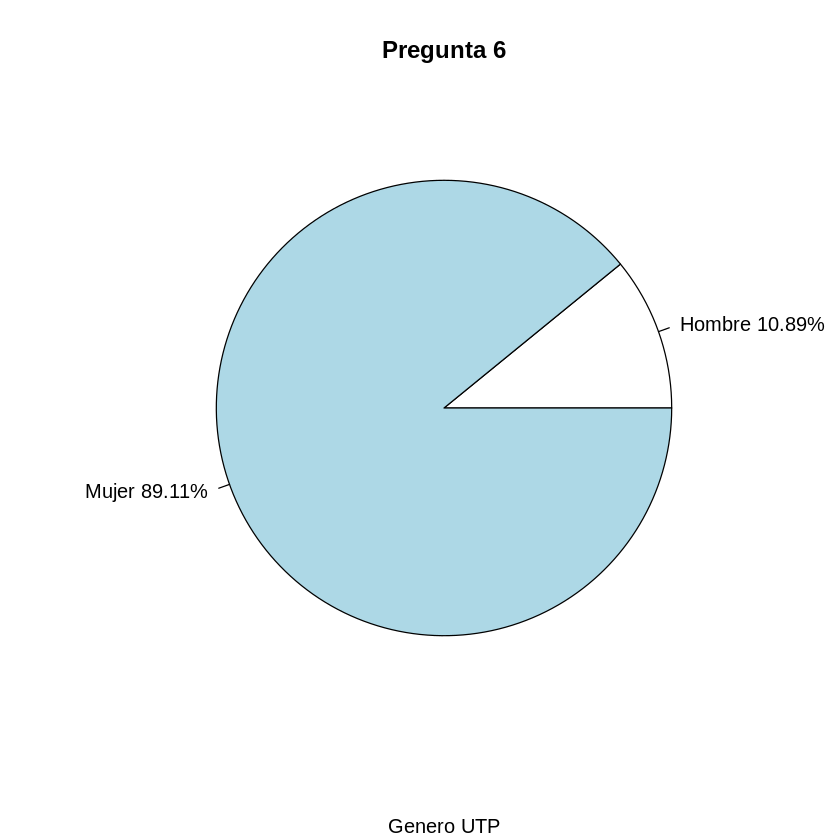

In [66]:
pie(porcentajes, etiquetas,
    main = "Pregunta 6",
    sub = "Genero UTP")

## Pregunta 7

## Género inspector(a) general

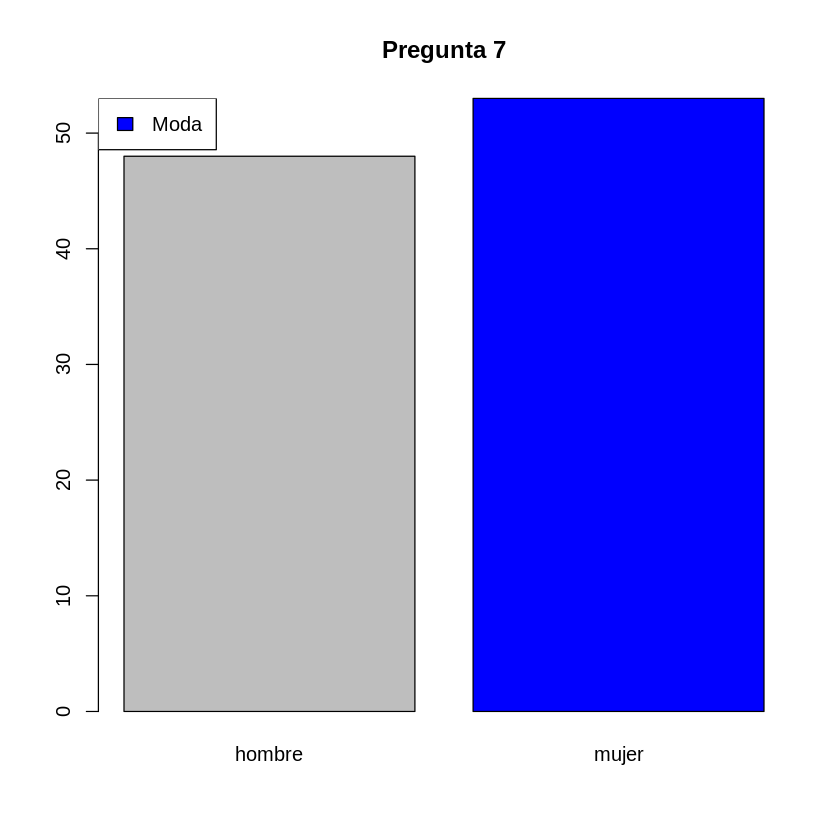

In [67]:
barplot(table(datos[,7]),main = "Pregunta 7", col = c(rep("gray", 1),4))
legend("topleft", "Moda", fill = 4)

In [69]:
#cov(my_data)

In [13]:
#library(psych)
#library(abind)
#library(foreach)
#library(multicon)

In [259]:
#help(MTMM) descartada por ser muy pocos datos

# Validez

### Validez de constructo. Evalúa el grado en que el instrumento refleja la teoría del fenómeno o del concepto que mide. La validez de construcción garantiza que las medidas que resultan de las respuestas del cuestionario pueden ser consideradas y utilizadas como medición del fenómeno que queremos medir.
### Puede ser calculada por diversos métodos, pero los más frecuentes son el análisis factorial y la matrizmultirrasgo-multimétodo.

,SameTrait,SameMethod,DiffDiff
Results,NaN,NaN,0.154776


In [16]:
help(inner.outer)